1.Présentation générale de l'ensemble de données¶

*contexte

Cet ensemble de données peut être trouvé en ligne à l'adresse : https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx
On vise  à comprendre la dynamique de la stabilité financière dans le contexte africain.

*contenu.
L'ensemble de données se concentre spécifiquement sur les crises bancaires,  la dette, financières, L'inflation et systémiques qui  sont produites, de 1860 à 2014, dans 13 pays africains à savoir : le Maroc, l'Angola, la République centrafricaine, la Côte d'Ivoire, l'Égypte, le Kenya, Maurice, le Nigeria, l'Afrique du Sud, la Tunisie, la Zambie et le Zimbabwe,l'Algérie.

Objectifs:
A travers l'exploration de cette dataset on vise à répondre au questions ci-dessus et par la suite construire un modèle pour la prédiction de crises bancaires dans ces pays africains.

i) Comment les 13 pays africains ont-ils été affectés par les défauts de paiement de la dette et les crises de 1860 à 2014 ?

ii) Quelle était la situation des défauts de paiement de la dette et des crises dans les pays africains avant et après l'indépendance ?

iii) Quels facteurs sont les plus associés aux crises bancaires en Afrique ?



### Chargement des librairies nécessaire

In [2]:
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import pandas as pd
import numpy as np
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import logit
from numpy import polyfit
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.metrics import precision_score, recall_score,roc_auc_score,roc_curve, auc 


###2.Chargement et description du dataset

In [3]:
df = pd.read_csv('african_crises.csv')

In [4]:
print('African_crisis dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
print("Columns names are \n {}".format(df.columns))

African_crisis dataset has 1059 rows, and 14 columns
Columns names are 
 Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [5]:
df.sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
670,45,NGA,Nigeria,1976,0,0.631074,0,0,0.0,18.336434,1,0,0,no_crisis
195,10,CAF,Central African Republic,1990,1,256.449819,0,1,0.0,-0.203000,1,0,0,crisis
257,15,CIV,Ivory Coast,1989,1,305.000000,0,1,0.0,0.986000,1,0,0,crisis
799,56,ZAF,South Africa,1991,0,2.743033,0,0,0.0,15.566000,1,0,0,no_crisis
46,1,DZA,Algeria,1976,0,4.359000,0,0,0.0,17.173519,1,0,0,no_crisis


### Variables
1) systemic_crisis :  "0" signifie qu'aucune crise systémique ne s'est produite pendant l'année et "1" signifie qu'une crise systémique s'est produite pendant l'année..

2) exch_usd :  Le taux de change du pays par rapport au dollar américain.

3) domestic_debt_in_default : "0" signifie qu'aucun défaut de la dette souveraine domestique ne s'est produit pendant l'année et "1" signifie qu'un défaut de la dette souveraine domestique s'est produit pendant l'année.

4) sovereign_external_debt_default : "0" signifie qu'aucun défaut de la dette souveraine externe ne s'est produit pendant l'année et "1" signifie qu'un défaut de la dette souveraine externe s'est produit pendant l'année.

5) gdp_weighted_default : La dette totale en défaut par rapport au PIB.

6) inflation_annual_cpi : Le taux d'inflation annuel de l'IPC..

7) independence : "0" signifie "pas d'indépendance" et "1" signifie "indépendance".

8) currency_crises :0" signifie qu'aucune crise monétaire ne s'est produite pendant l'année et "1" signifie qu'une crise monétaire s'est produite pendant l'année.

9) Inflation_crises : "0" signifie qu'aucune crise d'inflation ne s'est produite pendant l'année et "1" signifie qu'une crise d'inflation s'est produite pendant l'année.

10) banking_crisis :  "no_crisis" signifie qu'aucune crise bancaire ne s'est produite pendant l'année et "crisis" signifie qu'une crise bancaire s'est produite pendant l'année.

# 3. Exploration des données:

In [6]:
# Afficher les informations du dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

##### intérprétation:

* il n'y a pas de valeurs manquantes dans notre dataset

In [8]:
# staistiques discriptives du dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,1059.0,35.613787,23.692402,1.000000,15.000000,38.00000,56.000000,7.000000e+01
year,1059.0,1967.767705,33.530632,1860.000000,1951.000000,1973.00000,1994.000000,2.014000e+03
systemic_crisis,1059.0,0.077432,0.267401,0.000000,0.000000,0.00000,0.000000,1.000000e+00
exch_usd,1059.0,43.140831,111.475380,0.000000,0.195350,0.86840,8.462750,7.443061e+02
domestic_debt_in_default,1059.0,0.039660,0.195251,0.000000,0.000000,0.00000,0.000000,1.000000e+00
sovereign_external_debt_default,1059.0,0.152975,0.360133,0.000000,0.000000,0.00000,0.000000,1.000000e+00
gdp_weighted_default,1059.0,0.006402,0.043572,0.000000,0.000000,0.00000,0.000000,4.000000e-01
inflation_annual_cpi,1059.0,20848.892444,675727.429176,-28.502137,2.086162,5.76233,11.644048,2.198970e+07
independence,1059.0,0.776204,0.416984,0.000000,1.000000,1.00000,1.000000,1.000000e+00
currency_crises,1059.0,0.132200,0.349847,0.000000,0.000000,0.00000,0.000000,2.000000e+00


In [12]:
#supprimer case,cc3
df.drop(columns=['case','cc3'], axis=1, inplace=True)

#Coder banking_crisis to 0 and 1
labels = {'no_crisis': 0, 'crisis': 1}
df['banking_crisis'] = df['banking_crisis'].map(labels)

# Suppression  l'étiquette de 2 dans les crises monétaires car la variable ne devrait avoir que 2 étiquettes 0 et 1
df['currency_crises'] = df['currency_crises'].replace(2,np.nan)
df = df.dropna()


##### Comment les 13 pays africains ont-ils été touchés par les défauts de paiement et les différentes crises entre 1860 et 2014 ?

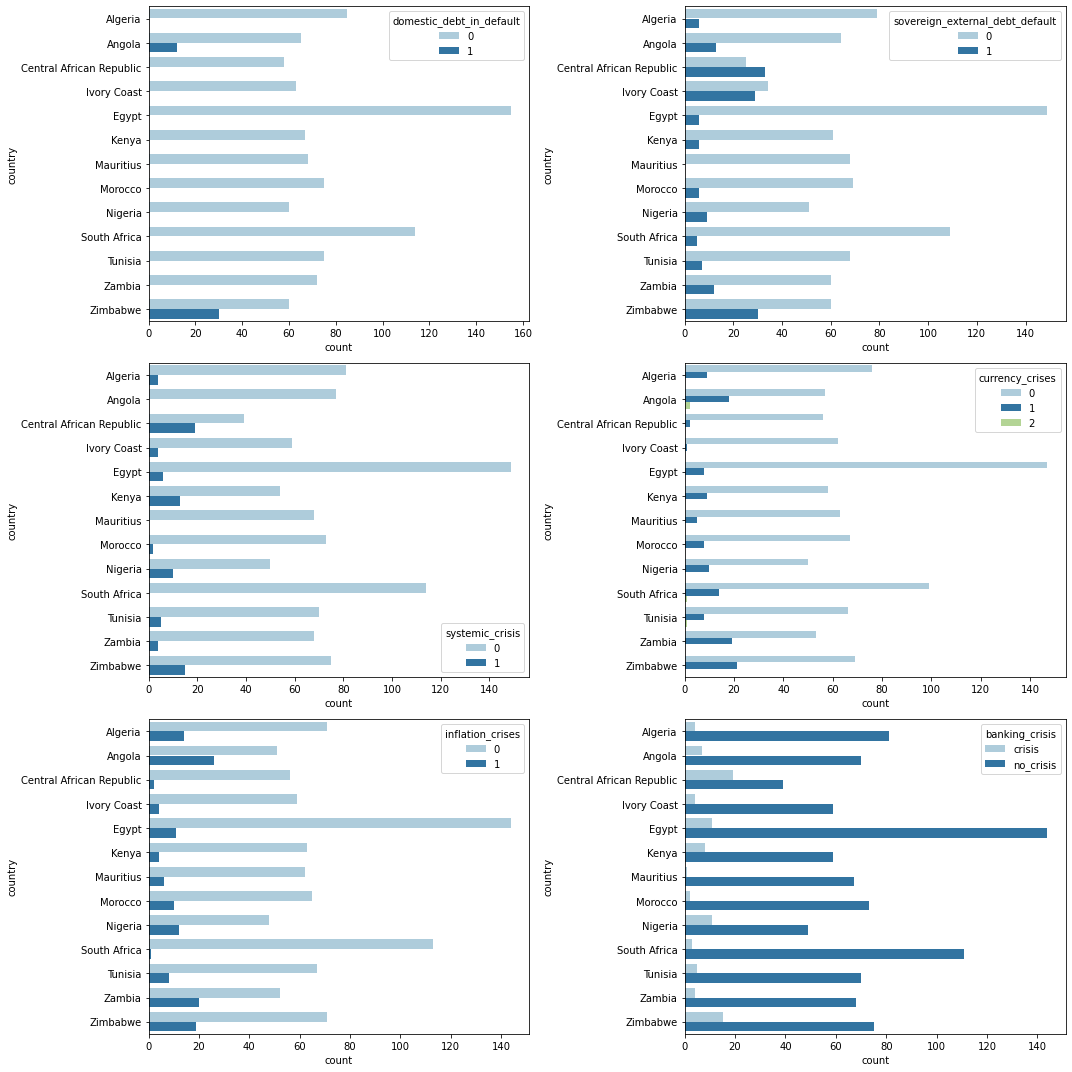

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = df, hue = i, palette = 'Paired')
plt.tight_layout()
display()

## Intérprétation des résultats

### A partir de la Visualization:

**variables indépendantes**

1) Domestic Debt in Default:La dette intérieure est la dette d'un gouvernement central. Il s'agit de la dette émise par les prêteurs du pays (par exemple, les institutions financières du pays). 

**Seulement 2 pays ; L'Angola et le Zimbabwe étaient dans Domestic Debt in Default entre les années 1860 et 2014.**

2) Sovereign  External Debt Default: La dette extérieure est la partie de la dette d'un pays qui a été empruntée à des prêteurs étrangers, y compris des banques commerciales, des gouvernements ou des institutions financières internationales. Ces prêts, y compris les intérêts, doivent généralement être payés dans la devise dans laquelle le prêt a été consenti. Pour gagner la monnaie nécessaire, le pays emprunteur peut vendre et exporter des biens vers le pays du prêteur.

**Tous les pays, à l'exception de Maurice, ont subi un défaut de paiement de la dette extérieure souveraine entre les années 1860 et 2014. Les pays les plus touchés sont la République centrafricaine, la Côte d'Ivoire et le Zimbabwe.**

3) Systemic Crisis:  La crise systémique est un effet domino dans lequel un problème financier se propage. entre les institutions et les marchés jusqu'à affecter l'ensemble monétaire. et le système financier avec des conséquences économiques mondiales désastreuses.

**Entre 1860 et 2014, tous les pays sauf l'Angola, Maurice et l'Afrique du Sud ont été touchés par la crise systémique. Les pays les plus touchés sont la République centrafricaine, le Zimbabwe, le Kenya et le Nigeria.**

4) Currency Crisis:  Une crise monétaire est une situation dans laquelle il existe un doute sérieux quant à savoir si la banque centrale d'un pays dispose de réserves de change suffisants pour maintenir le taux de change fixe du pays. La crise s'accompagne souvent d'une attaque spéculative sur le marché des changes.

**Tous les pays ont été touchés par la crise monétaire au cours de cette période et les pays les plus touchés ont été le Zimbabwe, la Zambie, l'Angola et l'Afrique du Sud.**

5) Inflation Crisis: L'inflation est une mesure quantitative du taux auquel le niveau de prix moyen d'un panier de biens et services sélectionnés dans une économie augmente sur une période de temps. C'est la hausse constante du niveau général des prix où une unité monétaire achète moins qu'elle ne le faisait au cours des périodes précédentes.

**Tous les pays ont été touchés par la crise de l'inflation au cours de cette période ; les pays les plus touchés étant l'Angola, la Zambie, le Zimbabwe, l'Algérie.**
**Variable dépendante**

6) Banking Crisis:Une crise bancaire est souvent associée à une crise financière. Il fait référence à une panique ou à une panique bancaire au cours de laquelle les investisseurs vendent des actifs ou retirent de l'argent de comptes d'épargne parce qu'ils craignent que la valeur de ces actifs ne baisse s'ils restent dans une institution financière.

**Entre les périodes 1860 à 2014, tous les pays ont souffert de la crise bancaire et les pays les plus touchés ont été la République centrafricaine, le Zimbabwe, le Nigéria, l'Égypte et le Kenya.**

##### Autres observations:

* Tous les pays qui ont subi une crise systémique ont également souffert d'une crise bancaire. La République centrafricaine, le Zimbabwe, le Kenya et le Nigéria avaient le nombre le plus élevé dans chaque cas à cette époque.
* Le Zimbabwe a souffert de tous les défauts de paiement ainsi que des crises au cours de cette période.

#### Quelle était la situation  de debt defaults and crises dans les pays africains avant et après l'indépendance ?

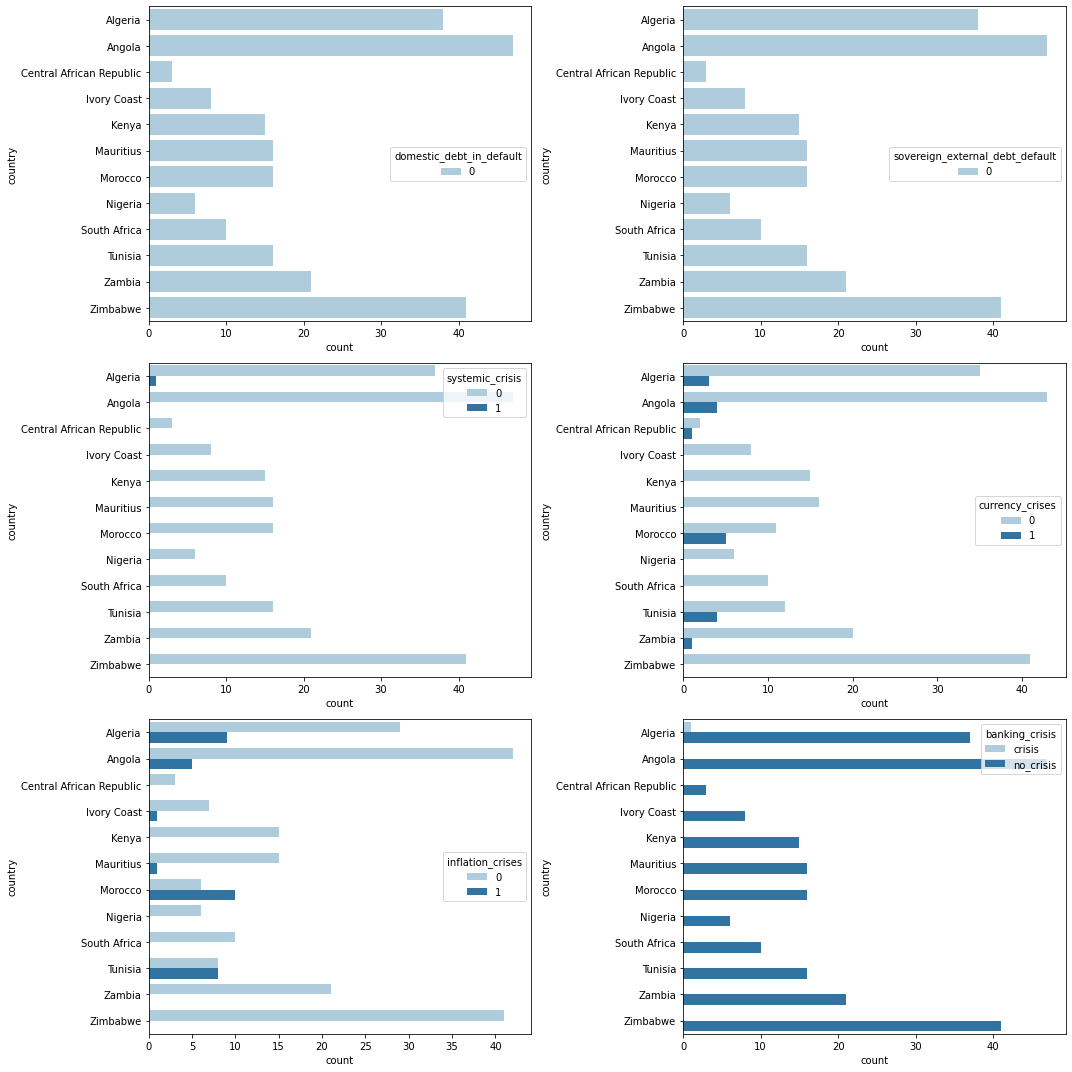

In [7]:
before_independence = df[df['independence']==0]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = before_independence, hue = i, palette = 'Paired')
plt.tight_layout()
display()

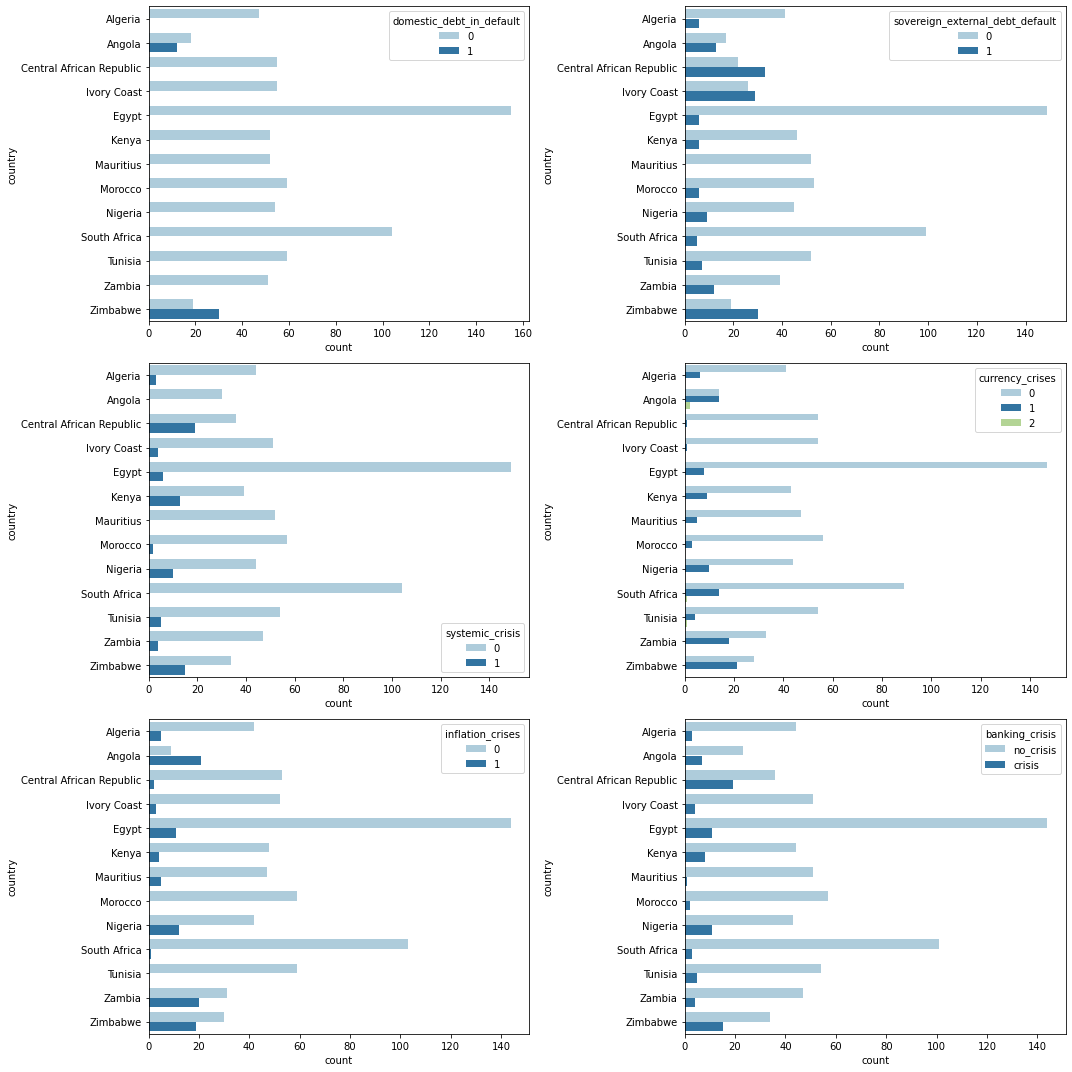

In [8]:
after_independence = df[df['independence']==1]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
axes = axes.flatten()
cols = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = after_independence, hue = i, palette = 'Paired')
plt.tight_layout()
display()

### intérprétation des résultats:

##### Observations Avant and Après l'independance:

1) Après l'indépendance, la plupart des pays africains ont commencé à souffrir de crises économiques, bancaires et systémiques.

2) L'inflation et la crise monétaire étaient les principales formes de crises affectant certains pays africains avant l'indépendance, l'inflation étant la plus et le plus touchée par le Maroc, l'Algérie, la Tunisie et l'Angola. Ces pays, en revanche, ont enregistré le plus faible nombre de crises et de debt defaults après l'indépendance, à l'exception de l'Angola.

3) La majorité des pays africains qui ont connu une crise bancaire ont également connu une crise systémique après l'indépendance. Les plus touchés ont été la République centrafricaine, le Zimbabwe, le Kenya et le Nigéria.

4) Aucun pays n'a subi de défaut de paiement sur sa dette intérieure ou extérieure avant l'indépendance, mais après l'indépendance, la plupart des pays ont souffert en particulier de la crise de la dette extérieure les plus touchés étant la République centrafricaine, la Côte d'Ivoire, le Zimbabwe, la Zambie et l'Angola.

5) Le Zimbabwe est le pays qui a été le plus touché par toutes les crises et debt defaults après l'indépendance. Ce pays, en revanche, n'a jamais connu aucune forme de crise ou de défaut de paiement avant l'indépendance.

6) Maurice est le seul pays qui a enregistré le moins de crises économiques et bancaires avant et après l'indépendance.


##  Quels facteurs sont principalement associés aux crises bancaires en Afrique ?

  * Test d'association  et de signification statistique 

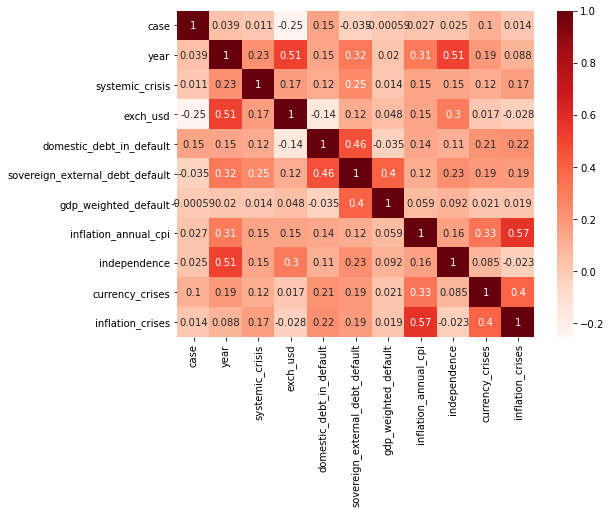

In [9]:
#Matrice de correlation
plt.figure(figsize=(8,6))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### intérprétation des résultats.

#### À partir de la matrice de corrélation:

1) Toutes les caractéristiques montrent une corrélation positive avec la crise bancaire.

2) La crise bancaire a une très forte corrélation positive avec la crise systémique. Cela explique pourquoi les pays africains qui ont été principalement touchés par la crise bancaire ont subi une crise systémique.

3) En outre la crise systémique, la crise bancaire montre également une forte corrélation positive avec Sovereign External Debt Default, domestic_debt_in_default,year, inflation_annual_cpi et Inflation Crisis.

#### Conclusion

* La crise bancaire est principalement associée à Systemic Crisis,Sovereign External Debt Default,year et Inflation Crisis. 

### La relation entre la crise bancaire et les covariables associées est-elle statistiquement significative ?

**H0: L'association entre la crise bancaire et les autres covariables est statistiquement significative**
    
**H1 : L'association entre la crise bancaire et les autres covariables n'est pas statistiquement significative**

In [13]:
#Drop country since it is not numerical and systemic crisis because it has a strong positive correlation 
#with Banking Crisis hence might dominate.
df2 = df.drop(columns=['country','systemic_crisis'],axis = 1)
# Logistic Regression
crisis = logit("banking_crisis ~ year + exch_usd + sovereign_external_debt_default"
                   " + domestic_debt_in_default + currency_crises + gdp_weighted_default + independence"
                         "+ inflation_crises + inflation_annual_cpi", df2).fit()
print(crisis.summary())

Optimization terminated successfully.
         Current function value: 0.228492
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:         banking_crisis   No. Observations:                 1055
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            9
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.2339
Time:                        03:56:51   Log-Likelihood:                -241.06
converged:                       True   LL-Null:                       -314.64
Covariance Type:            nonrobust   LLR p-value:                 3.401e-27
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -42.4209     12.286     -3.453 

### interprétation des résultats:


* L'association entre la crise bancaire et l'année, le taux de change de l'USD, l'indépendance et la crise de l'inflation est statistiquement significative (P-Value < 0,05).

* D'autre part, le défaut de la dette extérieure souveraine, la dette intérieure en défaut, les crises monétaires, le défaut pondéré par le PIB et l'IPC annuel de l'inflation n'ont pas d'association significative avec la crise bancaire (P-Value > 0,05).

# 4. Construction du modèle
#####  construction du modèle pour prédire la crise bancaire dans les pays africans


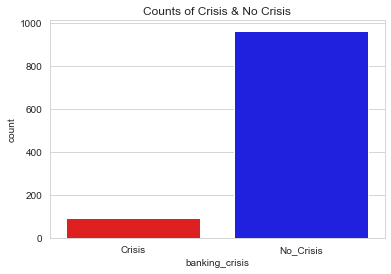

In [14]:
colors = ["r", "b"]
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

x = df2.banking_crisis.replace(to_replace=[1, 0], value=['Crisis','No_Crisis'])
sns.countplot(x,palette=colors)
plt.title('Counts of Crisis & No Crisis')
plt.show()

#### Intérprétation des résultats
#### A partir de la visualisation;

**Traitement du déséquilibre de classe et de la répartition entraînement/test** 
* Les données sont fortement déséquilibrées, les classificateurs peuvent donc être biaisés en faveur de la classe majoritaire.
* La modification du seuil de classification est alors nécessaire. La méthode de suréchantillonnage a été utilisée pour garantir une classe équilibrée.

**Faire face au déséquilibre de classe et à la répartition entraînement/test**

In [15]:
no_crisis = df2[df2.banking_crisis == 0]
crisis = df2[df2.banking_crisis == 1]
from sklearn.utils import resample
# upsample minority
crisis_upsampled = resample(crisis,
                          replace=True, 
                          n_samples=len(no_crisis), 
                          random_state=123)
# combine majority and upsampled minority
upsampled = pd.concat([no_crisis, crisis_upsampled])
# check new class counts
upsampled.banking_crisis.value_counts()
y= upsampled.banking_crisis
X = upsampled.drop('banking_crisis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y.value_counts()


1    962
0    962
Name: banking_crisis, dtype: int64

In [29]:
#Construction de cinq classificateurs pour obtenir et utliser celui qui donne la meilleure prédiction.
classifiers = {
'LogisticRegression' : LogisticRegression(solver='liblinear'),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}    

models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])
for classifier, classifier_name in zip(classifiers.values(), classifiers.keys()):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    t = pd.Series({ 
                     'Model': classifier_name,
                     'Precision_score': precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': recall_score(y_test, y_pred,average='macro'),
                     'F1_score': f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': accuracy_score(y_test, y_pred)}
                   )
    models_report = models_report.append(t, ignore_index = True)
models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.766421,0.751013,0.745017,0.748052
1,RandomForest,0.982843,0.981383,0.981787,0.981818
2,DecisionTreeClassifier,0.971292,0.968085,0.968738,0.968831
3,SVM,0.747368,0.512690,0.355738,0.501299
4,KNeighborsClassifier,0.943694,0.933511,0.934555,0.935065
5,GradientBoosting,0.954125,0.949711,0.950457,0.950649


In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#Ajouter les algorithmes de clustering au celle de classifications pour obtenir et utliser celui qui donne la meilleure prédiction.

classifiers = {
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'RandomForest': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'KMeans': KMeans(n_clusters=2),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)

}
models_report = pd.DataFrame(columns=['Model', 'Precision_score', 'Recall_score',
                                      'F1_score', 'Accuracy', 'Adjusted_rand_score', 'Silhouette_score'])
for classifier, classifier_name in zip(classifiers.values(), classifiers.keys()):
    if isinstance(classifier, (LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, SVC, KNeighborsClassifier)):
        # For classification models
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        t = pd.Series({
            'Model': classifier_name,
            'Precision_score': precision_score(y_test, y_pred, average='macro'),
            'Recall_score': recall_score(y_test, y_pred, average='macro'),
            'F1_score': f1_score(y_test, y_pred, average='macro'),
            'Accuracy': accuracy_score(y_test, y_pred)}
        )
    else:
        # For clustering models
        y_pred = classifier.fit_predict(X)
        t = pd.Series({
            'Model': classifier_name,
            'Adjusted_rand_score': adjusted_rand_score(y, y_pred),
            'Silhouette_score': silhouette_score(X, y_pred)}
        )
    models_report = models_report.append(t, ignore_index=True)

models_report


,Model,Precision_score,Recall_score,F1_score,Accuracy,Adjusted_rand_score,Silhouette_score
0,LogisticRegression,0.766421,0.751013,0.745017,0.748052,NaN,NaN
1,RandomForest,0.982843,0.981383,0.981787,0.981818,NaN,NaN
2,DecisionTreeClassifier,0.971292,0.968085,0.968738,0.968831,NaN,NaN
3,SVM,0.747368,0.512690,0.355738,0.501299,NaN,NaN
4,KNeighborsClassifier,0.943694,0.933511,0.934555,0.935065,NaN,NaN
5,KMeans,NaN,NaN,NaN,NaN,0.000143,0.999958
6,AgglomerativeClustering,NaN,NaN,NaN,NaN,0.000143,0.999958
7,DBSCAN,NaN,NaN,NaN,NaN,0.497132,0.083816


In [30]:
  #Cross Validation
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 73.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 98.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 51.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 95.0 % accuracy score


In [17]:
#Hyperparameter tuning en utlisant Gridsearch
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver' : ['lbfgs', 'liblinear'] }
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,7,1)), 
              "min_samples_leaf": list(range(2,4,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# DecisionTree best estimator
tree_clf = grid_tree.best_estimator_
#Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_rf_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 100,  verbose=2, random_state=42, n_jobs = -1)
grid_rf_random.fit(X_train, y_train)
#Random Forest best estimator
rf_clf=grid_rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.3min finished


**Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Logistic Regression**

Confusion matrix, without normalization
[[140  57]
 [ 28 160]]


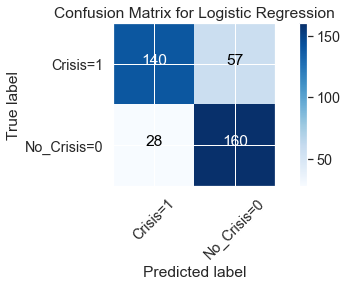

In [ ]:
y_pred = log_reg.predict(X_test)
log_cnf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(7, 4))
sns.set(font_scale=1.3)
plot_confusion_matrix(log_cnf_matrix, 
                      classes=['Crisis=1','No_Crisis=0'],
              normalize= False,  
              title='Confusion Matrix for Logistic Regression')
plt.show()

**Decision Tree**

Confusion matrix, without normalization
[[197   0]
 [ 25 163]]


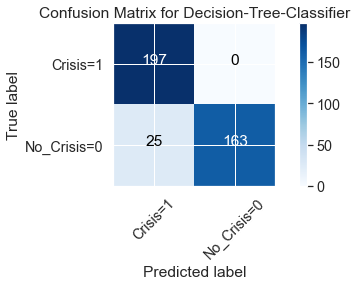

In [ ]:
y_pred = tree_clf.predict(X_test)
Dtrees_cnf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(7, 4))
sns.set(font_scale=1.3)
plot_confusion_matrix(Dtrees_cnf_matrix, 
                      classes=['Crisis=1','No_Crisis=0'],
              normalize= False,  
              title='Confusion Matrix for Decision-Tree-Classifier')
plt.show()

**Random Forest**

Confusion matrix, without normalization
[[197   0]
 [  6 182]]


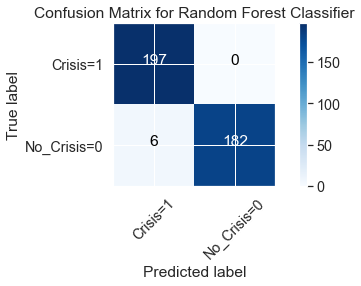

In [ ]:
y_pred = rf_clf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure(figsize=(7, 4))
sns.set(font_scale=1.3)
plot_confusion_matrix(rf_cnf_matrix, 
                      classes=['Crisis=1','No_Crisis=0'],
              normalize= False,  
              title='Confusion Matrix for Random Forest Classifier')
plt.show()

Conclusion: